# Geospatial data examples
## Python and Github

UW Geospatial Data Analysis  
CEE467/CEWA567  
David Shean, Eric Gagliano, Quinn Brencher

This notebook is meant to show off some of the types of datasets we'll learn about this quarter. At this point, there is no need to understand the code, we'll get there one step at a time!

As you're looking through the notebook, think about...
* What are the potential use cases for different datasets?
* What is the structure of these datasets? What do rows and columns represent in each?
* Why might a dataset be more appropriate as a certain data type (think vector vs raster, etc)?
* How might you use these or similar datasets in your own work or interests?

*No need to run this notebook unless you want to interact with the code. If you run the notebook, make sure to shut down the kernel afterwards because this notebook takes up a lot of RAM!*

### Imports

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray
import rasterio as rio
import matplotlib.pyplot as plt
import matplotlib
import requests
import contextily as ctx
import pystac_client
import planetary_computer
import odc.stac
import easysnowdata

## Vector example 1: [Natural Earth Countries](https://www.naturalearthdata.com/downloads/10m-cultural-vectors/10m-admin-0-countries/)

### Read data

In [2]:
world_gdf = gpd.read_file(f"zip+https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip")

### Preview data structure

In [3]:
world_gdf

featurecla  scalerank  LABELRANK                   SOVEREIGNT  \
0    Admin-0 country          1          6                         Fiji   
1    Admin-0 country          1          3  United Republic of Tanzania   
2    Admin-0 country          1          7               Western Sahara   
3    Admin-0 country          1          2                       Canada   
4    Admin-0 country          1          2     United States of America   
..               ...        ...        ...                          ...   
172  Admin-0 country          1          5           Republic of Serbia   
173  Admin-0 country          1          6                   Montenegro   
174  Admin-0 country          1          6                       Kosovo   
175  Admin-0 country          1          5          Trinidad and Tobago   
176  Admin-0 country          1          3                  South Sudan   

    SOV_A3  ADM0_DIF  LEVEL               TYPE TLC  \
0      FJI         0      2  Sovereign country   1   
1      TZA         0      2  Sovereign country   1   
2      SAH         0      2      Indeterminate   1   
3      CAN         0      2  Sovereign country   1   
4      US1         1      2            Country   1   
..     ...       ...    ...                ...  ..   
172    SRB         0      2  Sovereign country   1   
173    MNE         0      2  Sovereign country   1   
174    KOS         0      2           Disputed   1   
175    TTO         0      2  Sovereign country   1   
176    SDS         0      2  Sovereign country   1   

                           ADMIN  ...        FCLASS_TR     FCLASS_ID  \
0                           Fiji  ...             None          None   
1    United Republic of Tanzania  ...             None          None   
2                 Western Sahara  ...     Unrecognized  Unrecognized   
3                         Canada  ...             None          None   
4       United States of America  ...             None          None   
..                           ...  ...              ...           ...   
172           Republic of Serbia  ...             None          None   
173                   Montenegro  ...             None          None   
174                       Kosovo  ...  Admin-0 country  Unrecognized   
175          Trinidad and Tobago  ...             None          None   
176                  South Sudan  ...             None          None   

           FCLASS_PL     FCLASS_GR        FCLASS_IT        FCLASS_NL  \
0               None          None             None             None   
1               None          None             None             None   
2       Unrecognized          None             None     Unrecognized   
3               None          None             None             None   
4               None          None             None             None   
..               ...           ...              ...              ...   
172             None          None             None             None   
173             None          None             None             None   
174  Admin-0 country  Unrecognized  Admin-0 country  Admin-0 country   
175             None          None             None             None   
176             None          None             None             None   

           FCLASS_SE        FCLASS_BD     FCLASS_UA  \
0               None             None          None   
1               None             None          None   
2               None             None          None   
3               None             None          None   
4               None             None          None   
..               ...              ...           ...   
172             None             None          None   
173             None             None          None   
174  Admin-0 country  Admin-0 country  Unrecognized   
175             None             None          None   
176             None             None          None   

                                              geometry  
0    MULTIPO

In [4]:
world_gdf.shape

(177, 169)

### Visualize data

Text(0.5, 1.0, 'Population by Country')

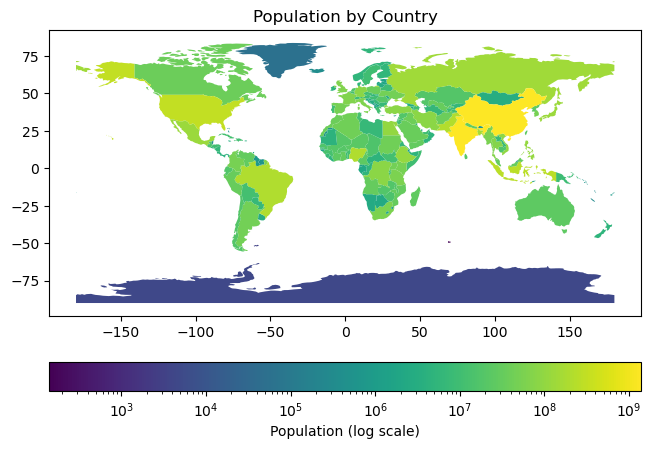

In [5]:
f,ax=plt.subplots(layout='compressed')
world_gdf.plot(ax=ax,
               column="POP_EST",
               legend=True,
               norm=matplotlib.colors.LogNorm(
                   vmin=world_gdf['POP_EST'].min(), 
                   vmax=world_gdf['POP_EST'].max()),
                legend_kwds={
                    'label': 'Population (log scale)',
                    'orientation': 'horizontal',
                },
              )

ax.set_title('Population by Country')

## Vector example 2: [GMBA Mountain Inventory v2](https://www.earthenv.org/mountains)

### Read data

In [6]:
url = (f"https://data.earthenv.org/mountains/standard/GMBA_Inventory_v2.0_standard_300.zip")
mountains_gdf = gpd.read_file("zip+" + url)

### Preview data structure

In [7]:
mountains_gdf

GMBA_V2_ID GMBA_V1_ID                     MapName  \
0         19102       None                Arctic Ocean   
1         11134    3.04.01       Appalachian Mountains   
2         12390       None  Cordillera Centroamericana   
3         12497       None           Caribbean Islands   
4         14271       None      South Atlantic Islands   
..          ...        ...                         ...   
286       11208    5.08.19               Central Range   
287       12748       None                      Borneo   
288       12756       None                        Java   
289       18917       None        Sulawesi Archipelago   
290       11154    5.07.09           Barisan Mountains   

                                 WikiDataUR     MapUnit  Hier_Lvl  \
0        https://www.wikidata.org/wiki/Q788  Aggregated         1   
1      https://www.wikidata.org/wiki/Q93332  Aggregated         2   
2    https://www.wikidata.org/wiki/Q5788379  Aggregated         2   
3     https://www.wikidata.org/wiki/Q664609  Aggregated         2   
4    https://www.wikidata.org/wiki/Q1482804  Aggregated         2   
..                                      ...         ...       ...   
286                                    None  Aggregated         6   
287    https://www.wikidata.org/wiki/Q36117  Aggregated         6   
288     https://www.wikidata.org/wiki/Q3757  Aggregated         6   
289                                    None  Aggregated         6   
290   https://www.wikidata.org/wiki/Q649051  Aggregated         7   

                                      Feature          Area    Perimeter  \
0                                       Ocean   57205.24576  22872.03994   
1    Mountain range with well-recognized name  129875.02600  37431.11230   
2    Mountain range with well-recognized name  284121.62390  31599.87888   
3                                 Archipelago   61738.67557  10329.79926   
4            Geographically-defined sub-range    5579.35771   1487.00483   
..                                        ...           ...          ...   
286  Mountain range with well-recognized name  263615.62150  12354.30388   
287                                    Island  248480.11360  28667.97285   
288                                    Island   42186.46494   6852.31987   
289                               Archipelago  128619.86330  11614.45005   
290  Mountain range with well-recognized name  120726.28300  11781.38549   

     Elev_Low  ...                     Name_ES               Name_FR  \
0         0.0  ...               Océano Ártico        Océan Arctique   
1      -159.0  ...                   Apalaches            Appalaches   
2        -1.0  ...  Cordillera Centroamericana                  None   
3       -40.0  ...                      Caribe              Caraïbes   
4      -133.0  ...        Océano Atlántico Sur  Océan Atlantique Sud   
..        ...  ...                         ...                   ...   
286       0.0  ...          Cordillera Central       Chaîne Centrale   
287     -48.0  ...              Isla de Borneo                Bornéo   
288       0.0  ...                        Java                  Java   
289     -16.0  ...                        None                  None   
290       0.0  ...       Cordillera de Barisan                  None   

               Name_PT                          Name_RU    Name_ZH  \
0        Oceano Ártico         Северный Ледовитый океан        北冰洋   
1            Apalaches                         Аппалачи    阿巴拉契亚山脉   
2                 None                             None       None   
3             Caraíbas                           Карибы      加勒比地区   
4        Atlântico Sul                  Южная Атлантика       南大西洋   
..                 ...                              ...        ...   
286               None  Центральный хребет Новой Гвинеи  巴布亞新幾內亞高地   
287             Bornéu                       Калимантан        婆罗洲   
288               Java                              Ява        爪哇岛   
2

In [8]:
mountains_gdf.shape

(291, 41)

### Visualize data

Text(0.5, 1.0, 'Mountain Range Area')

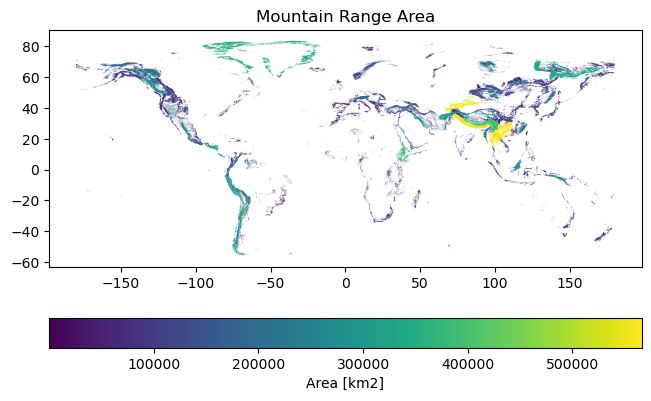

In [9]:
f,ax=plt.subplots(layout='compressed')
mountains_gdf.plot(ax=ax,
               column="Area",
               legend=True,
                legend_kwds={
                    'label': 'Area [km2]',
                    'orientation': 'horizontal',
                },
              )

ax.set_title('Mountain Range Area')

## Vector example 3: [NOAA's Significant Earthquake Database](https://www.ngdc.noaa.gov/hazel/view/hazards/earthquake/search)

### Read data

In [10]:
def load_and_prepare_earthquake_data():
    """
    Load and prepare global historical earthquake data from NOAA's API.
    Returns a GeoDataFrame of significant earthquakes.
    """
    # Use NOAA's official API endpoint for significant earthquakes
    base_url = "https://www.ngdc.noaa.gov/hazel/hazard-service/api/v1/earthquakes"
    
    # Get total number of pages from first request
    first_page = requests.get(base_url).json()
    total_pages = first_page['totalPages']
    
    # Initialize list to store all items
    all_items = []
    
    # Fetch all pages
    print(f"Fetching {total_pages} pages of earthquake data...")
    for page in range(total_pages):
        response = requests.get(f"{base_url}?page={page+1}").json()
        all_items.extend(response['items'])
    
    print(f"Total earthquakes fetched: {len(all_items)}")
    
    # Create DataFrame from all items
    df = pd.DataFrame(all_items)
    
    # Create GeoDataFrame from latitude and longitude
    gdf = gpd.GeoDataFrame(
        df, 
        geometry=gpd.points_from_xy(df.longitude, df.latitude),
        crs="EPSG:4326"  # WGS 84
    )
    
    # Filter for earthquakes with magnitude data
    gdf = gdf[gdf['eqMagnitude'].notna()]
    
    # Convert to Web Mercator for basemap compatibility
    #gdf = gdf.to_crs(epsg=3857)
    
    return gdf

earthquake_gdf = load_and_prepare_earthquake_data()

Fetching 33 pages of earthquake data...
Total earthquakes fetched: 6447


### Preview data structure

In [11]:
earthquake_gdf

id  year                           locationName  latitude  longitude  \
0         1 -2150          JORDAN:  BAB-A-DARAA,AL-KARAK    31.100     35.500   
2         3 -2000                       TURKMENISTAN:  W    38.000     58.200   
5        12 -1250               ISRAEL:  ARIHA (JERICHO)    32.000     35.500   
6        13 -1050       JORDAN:  SW:  TIMNA COPPER MINES    29.600     35.000   
9        17  -479                     GREECE:  MACEDONIA    39.700     23.300   
...     ...   ...                                    ...       ...        ...   
6441  10759  1570                           OMAN: QALHAT    22.600     59.400   
6442  10760  2024  TURKEY:  ELAZIG AND MALATYA PROVINCES    38.309     38.826   
6443  10761  2024         CUBA: GRANMA, SANTIAGO DE CUBA    19.812    -77.039   
6444  10762  2024    CALIFORNIA: OFFSHORE CAPE MENDOCINO    40.374   -125.022   
6445  10763  2024     VANUATU ISLANDS:  EFATE, PORT VILA   -17.686    168.034   

      eqMagnitude  damageAmountOrder  eqMagUnk  publish       country  ...  \
0             7.3                3.0       7.3     True        JORDAN  ...   
2             7.1                1.0       NaN     True  TURKMENISTAN  ...   
5             6.5                3.0       6.5     True        ISRAEL  ...   
6             6.2                3.0       6.2     True        JORDAN  ...   
9             7.0                NaN       NaN     True        GREECE  ...   
...           ...                ...       ...      ...           ...  ...   
6441          7.0                4.0       NaN     True          OMAN  ...   
6442          6.0                2.0       NaN     True        TURKEY  ...   
6443          6.8                3.0       NaN     True          CUBA  ...   
6444          7.0                NaN       NaN     True           USA  ...   
6445          7.3                3.0       NaN     True       VANUATU  ...   

      area  eqMagMfa  damageMillionsDollars  missing  missingAmountOrder  \
0      NaN       NaN                    NaN      NaN                 NaN   
2      NaN       NaN                    NaN      NaN                 NaN   
5      NaN       NaN                    NaN      NaN                 NaN   
6      NaN       NaN                    NaN      NaN                 NaN   
9      NaN       NaN                    NaN      NaN                 NaN   
...    ...       ...                    ...      ...                 ...   
6441   NaN       NaN                    NaN      NaN                 NaN   
6442   NaN       NaN                    NaN      NaN                 NaN   
6443   NaN       NaN                    NaN      NaN                 NaN   
6444    CA       NaN                    NaN      NaN                 NaN   
6445   NaN       NaN                    NaN      NaN                 NaN   

      missingTotal  missingAmountOrderTotal  damageMillionsDollarsTotal  \
0              NaN                      NaN                         NaN   
2              NaN                      NaN                         NaN   
5              NaN                      NaN                         NaN   
6              NaN                      NaN                         NaN   
9              NaN                      NaN                         NaN   
...            ...                      ...                         ...   
6441           NaN                      NaN                         NaN   
6442           NaN                      NaN                         NaN   
6443           NaN                      NaN                         NaN   
6444           NaN                      NaN                         NaN   
6445           NaN                      NaN                         NaN   

      eqMagMb                 geometry  
0         NaN        POINT (35.5 31.1)  
2         NaN          POINT (58.2 38)  
5         NaN          POINT (35.5 32)  
6         NaN          POINT (35 29.6)  
9         NaN        POINT (23.3 39.7)  
...       ...                      ... 

In [12]:
earthquake_gdf.shape

(4672, 50)

### Visualize data

Text(0.5, 1.0, 'Global Historical Significant Earthquakes')

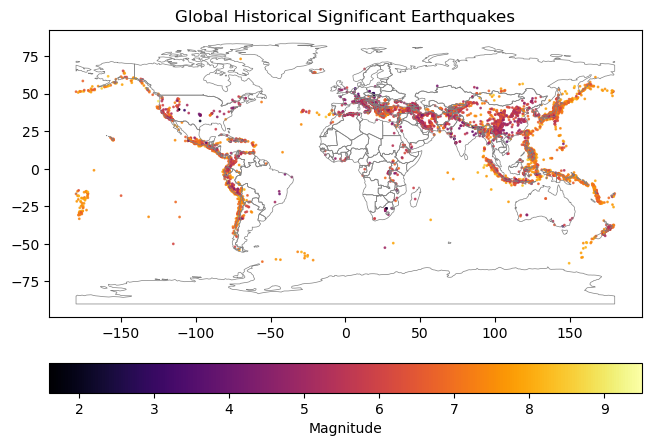

In [13]:
f, ax = plt.subplots(layout='compressed')

world_gdf.boundary.plot(ax=ax,color='grey',linewidth=0.5)

# Plot earthquakes
scatter = earthquake_gdf.plot(
    ax=ax,
    column='eqMagnitude',
    cmap='inferno',
    legend=True,
    legend_kwds={
        'label': 'Magnitude',
        'orientation': 'horizontal',
    },
    markersize=1,#earthquake_gdf['eqMagnitude'] * 1,  # Reduced size multiplier due to more points
    alpha=0.8
)

# # Add basemap
# ctx.add_basemap(
#     ax,
#     source=ctx.providers.Esri.WorldImagery
# )


ax.set_title('Global Historical Significant Earthquakes')

## Raster example 1: [Copernicus GLO-90 Digital Elevation Model](https://portal.opentopography.org/raster?opentopoID=OTSDEM.032021.4326.3)

### Read data

In [14]:
bbox = (-122.0, 46.7, -121.5, 47.0)

In [15]:
cop90_dem_da = easysnowdata.topography.get_copernicus_dem(bbox, resolution=90)

### Preview data structure

In [16]:
cop90_dem_da

<xarray.DataArray 'data' (latitude: 361, longitude: 601)> Size: 868kB
dask.array<getitem, shape=(361, 601), dtype=float32, chunksize=(361, 601), chunktype=numpy.ndarray>
Coordinates:
  * latitude     (latitude) float64 3kB 47.0 47.0 47.0 47.0 ... 46.7 46.7 46.7
  * longitude    (longitude) float64 5kB -122.0 -122.0 -122.0 ... -121.5 -121.5
    spatial_ref  int32 4B 4326
    time         datetime64[ns] 8B 2021-04-22

In [17]:
cop90_dem_da.values

array([[ 499.2021 ,  496.54   ,  495.75162, ..., 1218.6013 , 1234.3867 ,
        1233.8529 ],
       [ 508.11026,  508.29654,  507.0695 , ..., 1155.2106 , 1165.3165 ,
        1167.0106 ],
       [ 519.83374,  517.6379 ,  515.73   , ..., 1095.627  , 1106.0608 ,
        1106.6742 ],
       ...,
       [ 984.7717 ,  955.91187,  929.96   , ..., 1208.51   , 1210.0714 ,
        1209.9208 ],
       [ 950.2026 ,  925.1188 ,  901.5398 , ..., 1207.794  , 1216.0377 ,
        1216.38   ],
       [ 915.3658 ,  893.26587,  872.855  , ..., 1206.2902 , 1217.8804 ,
        1224.1011 ]], dtype=float32)

In [18]:
np.shape(cop90_dem_da.values)

(361, 601)

### Visualize data

Text(0.5, 1.0, 'Copernicus GLO-90 DEM')

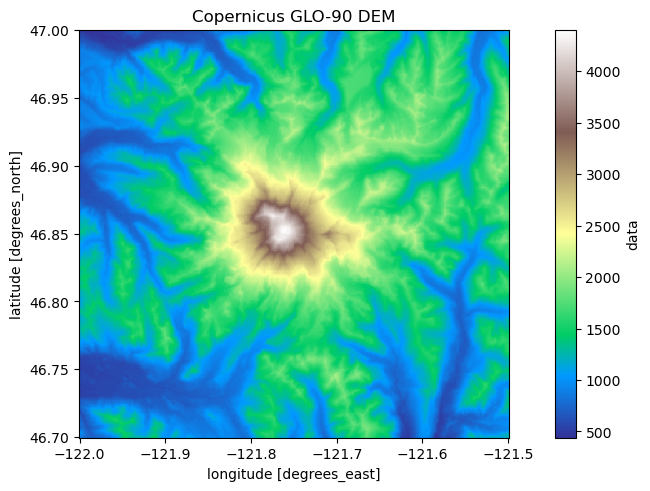

In [19]:
f,ax=plt.subplots(layout='compressed')
cop90_dem_da.plot(ax=ax,cmap='terrain')
ax.set_title('Copernicus GLO-90 DEM')

## Raster example 2: [ESA WorldCover 2021](https://worldcover2021.esa.int/)

### Read data

In [20]:
worldcover_da = easysnowdata.remote_sensing.get_esa_worldcover(bbox)

### Preview data structure

In [21]:
worldcover_da

<xarray.DataArray 'map' (latitude: 3600, longitude: 6000)> Size: 22MB
dask.array<getitem, shape=(3600, 6000), dtype=uint8, chunksize=(3600, 6000), chunktype=numpy.ndarray>
Coordinates:
  * latitude     (latitude) float64 29kB 47.0 47.0 47.0 47.0 ... 46.7 46.7 46.7
  * longitude    (longitude) float64 48kB -122.0 -122.0 -122.0 ... -121.5 -121.5
    spatial_ref  int32 4B 4326
    time         datetime64[ns] 8B 2021-01-01
Attributes:
    nodata:         0
    class_info:     {10: {'name': 'Tree cover', 'color': '#006400'}, 20: {'na...
    cmap:           <matplotlib.colors.ListedColormap object at 0x7ac749e91490>
    data_citation:  Zanaga, D., Van De Kerchove, R., De Keersmaecker, W., Sou...
    example_plot:   <function get_esa_worldcover.<locals>.plot_classes at 0x7...

In [22]:
worldcover_da.values

array([[10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       ...,
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10]], dtype=uint8)

In [23]:
np.shape(worldcover_da.values)

(3600, 6000)

### Visualize data

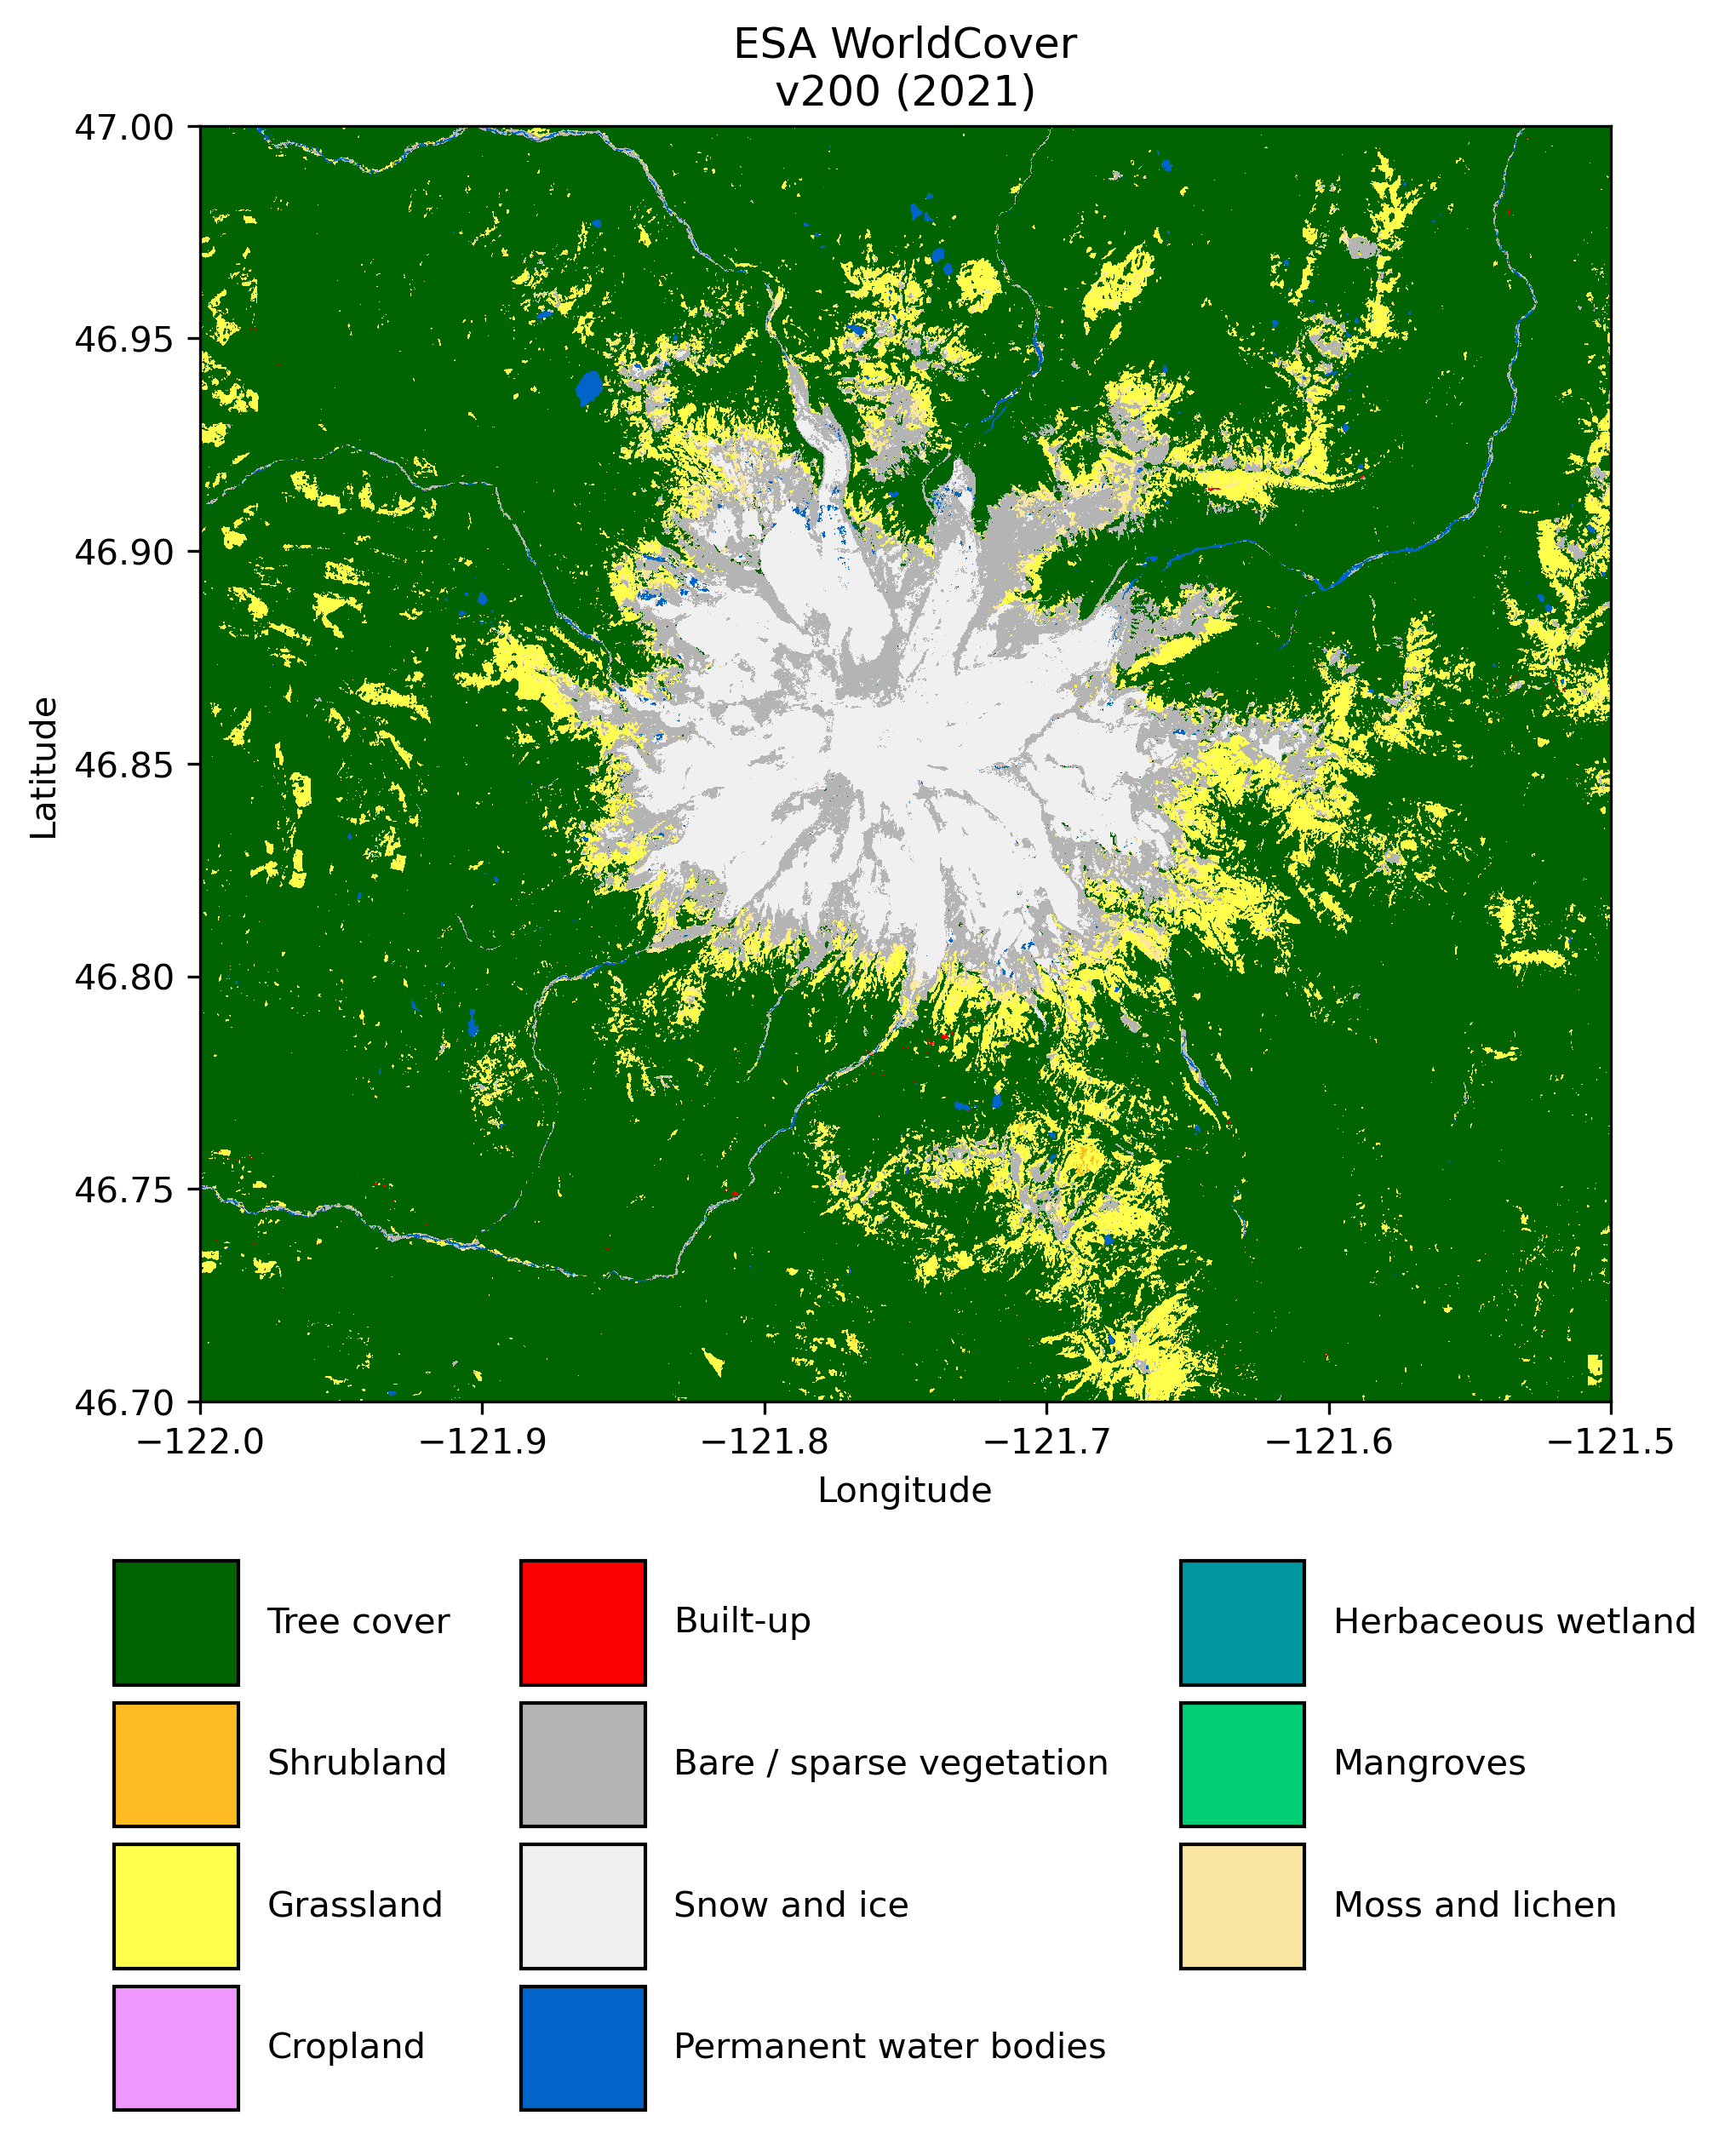

In [24]:
f, ax = worldcover_da.attrs['example_plot'](worldcover_da)

## Raster example 3: [Sentinel-2 RGB image](https://docs.sentinel-hub.com/api/latest/data/sentinel-2-l2a/)

### Read data

In [25]:
def norm(a, perc_lim=(2, 98), clip=True, verbose=False):
    #Simple approach using actual min and max values
    #amin, amax = (a.min(), a.max())
    #Check if we're using masked array or np.nan
    if np.ma.isMaskedArray(a):
        amin, amax = np.percentile(a.compressed(), perc_lim)
    else:
        amin, amax = np.nanpercentile(a, perc_lim)
    out = ((a - amin)/(amax - amin))
    #This will "clip" normalized values <0 to 0 and >1 to 1
    if clip:
        out = out.clip(0,1)
    if verbose:
        print("Input range: ({}, {})".format(a.min(), a.max()))
        print(f"Percentile range {perc_lim}: ({amin}, {amax})")
        print("Output range: ({}, {})".format(out.min(), out.max()))
    return out
    
catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

search = catalog.search(
    collections=["sentinel-2-l2a"],
    bbox=bbox,
    datetime=("2022-07-31", "2022-07-31"),
)
red_fn = search.item_collection()[3].assets['B04'].href
green_fn = search.item_collection()[3].assets['B03'].href
blue_fn = search.item_collection()[3].assets['B02'].href

red_src = rio.open(red_fn)
window = rio.windows.Window(8000, 0, 3*1024, 2*1024)
window_bounds = rio.windows.bounds(window, red_src.transform)
window_extent = [window_bounds[0], window_bounds[2], window_bounds[1], window_bounds[3]]

r = rio.open(red_fn).read(1,window=window)
g = rio.open(green_fn).read(1,window=window)
b = rio.open(blue_fn).read(1,window=window)

perc = (0, 90)

r_norm = norm(r, perc)
g_norm = norm(g, perc)
b_norm = norm(b, perc)


rgb = np.dstack([r_norm,g_norm,b_norm])

### Preview data structure

In [26]:
rgb

array([[[0.25661157, 0.26189128, 0.2309719 ],
        [0.32203857, 0.28765572, 0.27078454],
        [0.29201102, 0.28015289, 0.26478337],
        ...,
        [0.16143251, 0.19252548, 0.17300937],
        [0.16212121, 0.18530578, 0.17740047],
        [0.16639118, 0.18587203, 0.17227752]],

       [[0.23168044, 0.22989807, 0.21574941],
        [0.29173554, 0.26642129, 0.25263466],
        [0.28732782, 0.26882786, 0.26009953],
        ...,
        [0.1584022 , 0.18162514, 0.17242389],
        [0.15275482, 0.16208947, 0.16569087],
        [0.1523416 , 0.16605323, 0.16583724]],

       [[0.184573  , 0.20385051, 0.18881733],
        [0.21184573, 0.21191959, 0.19672131],
        [0.21983471, 0.22197055, 0.20769906],
        ...,
        [0.15055096, 0.15812571, 0.16129977],
        [0.15013774, 0.16718573, 0.16144614],
        [0.15275482, 0.17468856, 0.16671546]],

       ...,

       [[0.16363636, 0.1867214 , 0.17637588],
        [0.1607438 , 0.1817667 , 0.17652225],
        [0.15922865, 0

In [27]:
np.shape(rgb)

(2048, 2980, 3)

### Visualize data

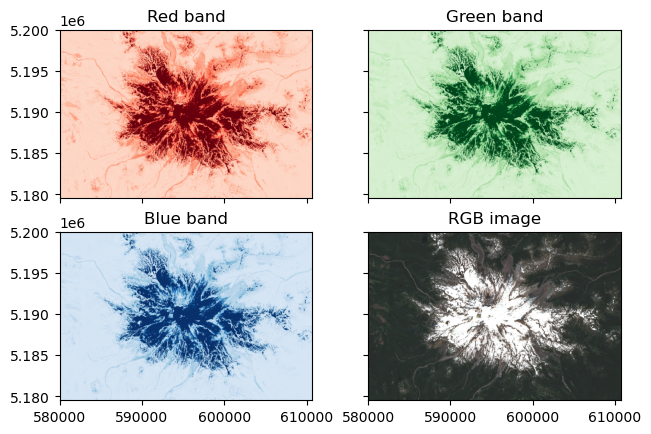

In [28]:
f, axs = plt.subplots(2,2, layout='compressed',sharex=True,sharey=True)
axs[0,0].imshow(rgb[:,:,0], cmap='Reds',extent=window_extent)
axs[0,1].imshow(rgb[:,:,1], cmap='Greens',extent=window_extent)
axs[1,0].imshow(rgb[:,:,2], cmap='Blues',extent=window_extent)
axs[1,1].imshow(rgb,extent=window_extent)

axs[0,0].set_title('Red band')
axs[0,1].set_title('Green band')
axs[1,0].set_title('Blue band')
axs[1,1].set_title('RGB image')

for ax in axs.flat:
    ax.set_aspect('equal')

## nDarray example 1: [Sentinel-2 image stack](https://docs.sentinel-hub.com/api/latest/data/sentinel-2-l2a/)

### Read data

In [29]:
bbox = (-122.0, 46.7, -121.5, 47.0)

In [30]:
s2 = easysnowdata.remote_sensing.Sentinel2(
    bbox_input=bbox,
    start_date="2022-07-21",
    end_date="2022-07-31",
    resolution=80,
)

Data searched. Access the returned seach with the .search attribute.
Data retrieved. Access with the .data attribute. Data CRS: WGS 84 / UTM zone 10N.
Nodata values removed from the data. In doing so, all bands converted to float32. To turn this behavior off, set remove_nodata=False.
Data acquired after January 25th, 2022 harmonized to old baseline. To override this behavior, set harmonize_to_old=False.
Data scaled to float reflectance. To turn this behavior off, set scale_data=False.
Metadata retrieved. Access with the .metadata attribute.


### Preview data structure

In [31]:
s2.data # click through data variables to explore the structure!

<xarray.Dataset> Size: 66MB
Dimensions:      (time: 5, y: 426, x: 484)
Coordinates:
  * y            (y) float64 3kB 5.206e+06 5.206e+06 ... 5.172e+06 5.172e+06
  * x            (x) float64 4kB 5.76e+05 5.761e+05 ... 6.146e+05 6.147e+05
    spatial_ref  int32 4B 32610
  * time         (time) datetime64[ns] 40B 2022-07-21T18:59:19.024000 ... 202...
Data variables: (12/16)
    coastal      (time, y, x) float32 4MB dask.array<chunksize=(1, 426, 484), meta=np.ndarray>
    blue         (time, y, x) float32 4MB dask.array<chunksize=(1, 426, 484), meta=np.ndarray>
    green        (time, y, x) float32 4MB dask.array<chunksize=(1, 426, 484), meta=np.ndarray>
    red          (time, y, x) float32 4MB dask.array<chunksize=(1, 426, 484), meta=np.ndarray>
    rededge      (time, y, x) float32 4MB dask.array<chunksize=(1, 426, 484), meta=np.ndarray>
    rededge2     (time, y, x) float32 4MB dask.array<chunksize=(1, 426, 484), meta=np.ndarray>
    ...           ...
    swir16       (time, y, x) float32 4MB dask.array<chunksize=(1, 426, 484), meta=np.ndarray>
    swir22       (time, y, x) float32 4MB dask.array<chunksize=(1, 426, 484), meta=np.ndarray>
    aot          (time, y, x) float32 4MB dask.array<chunksize=(1, 426, 484), meta=np.ndarray>
    scl          (time, y, x) float32 4MB dask.array<chunksize=(1, 426, 484), meta=np.ndarray>
    wvp          (time, y, x) float32 4MB dask.array<chunksize=(1, 426, 484), meta=np.ndarray>
    visual       (time, y, x) float32 4MB dask.array<chunksize=(1, 426, 484), meta=np.ndarray>
Attributes:
    band_info:       {'B01': {'name': 'coastal', 'description': 'Coastal aero...
    scl_class_info:  {0: {'name': 'No Data (Missing data)', 'color': '#000000...

### Visualize data

In [32]:
s2.get_rgb()

/srv/conda/envs/notebook/lib/python3.12/site-packages/rasterio/warp.py:387: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dest = _reproject(


RGB data retrieved.
Access with the following attributes:
.rgb for raw RGB,
.rgba for RGBA,
.rgb_percentile for percentile RGB,
.rgb_clahe for CLAHE RGB.
You can pass in percentile_kwargs and clahe_kwargs to adjust RGB calculations, check documentation for options.


Text(0.5, 1.02, 'Sentinel-2 RGB w/ clahe equalization')

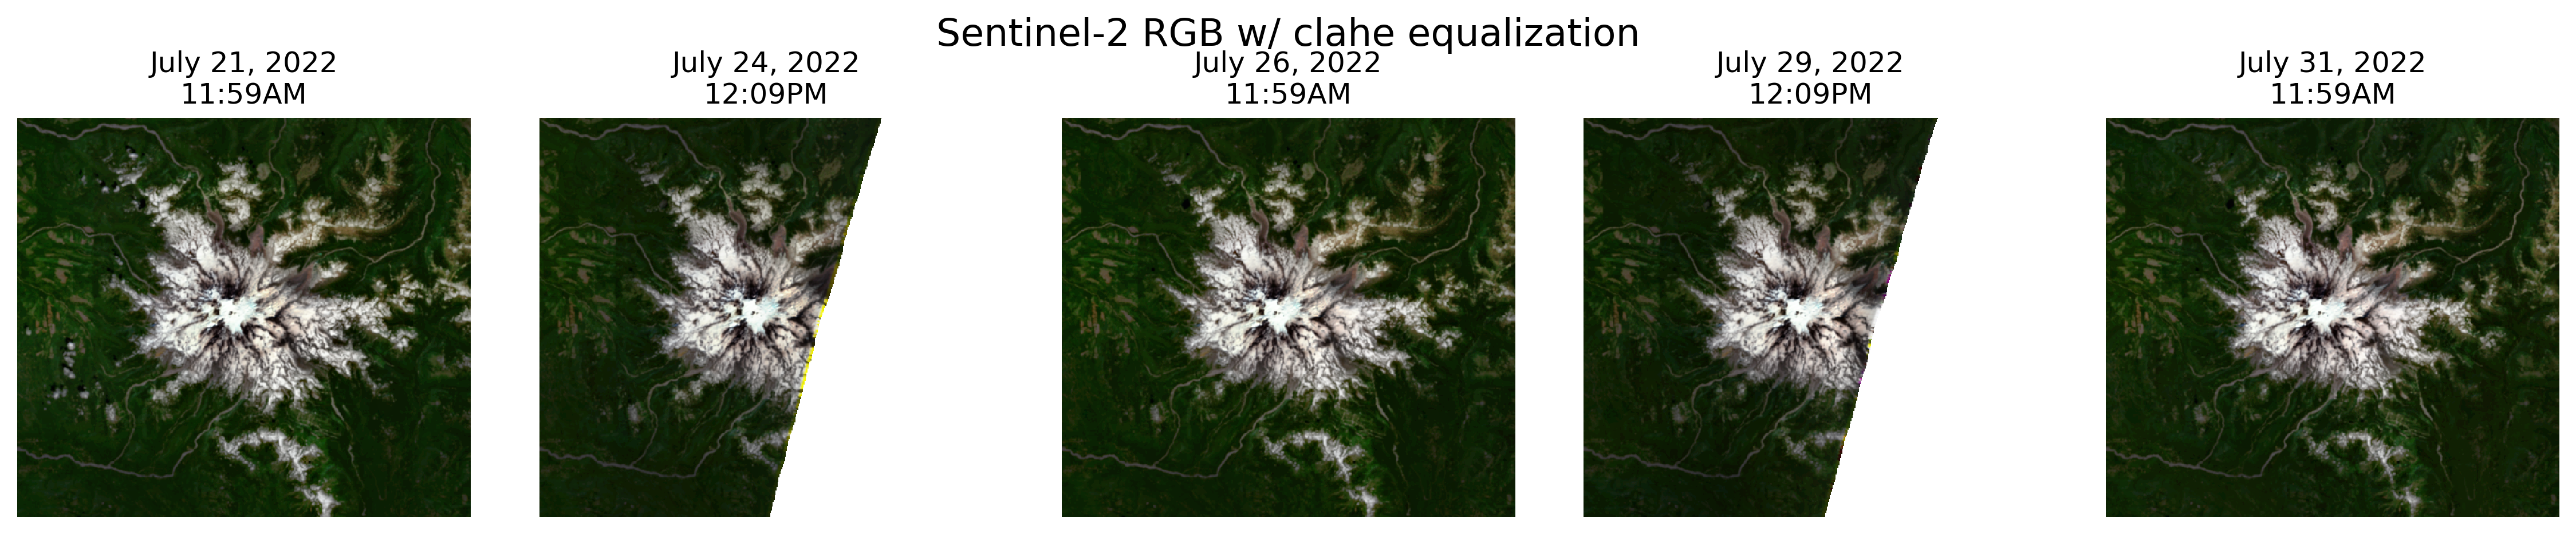

In [33]:
f = s2.rgb_clahe.plot.imshow(col='time',col_wrap=5, robust=False)

for ax, time, in zip(f.axs.flat, s2.rgb.time.values):
    local_time = pd.to_datetime(time).tz_localize('UTC').tz_convert('America/Los_Angeles')
    ax.set_title(f'{local_time.strftime("%B %d, %Y")}\n{local_time.strftime("%I:%M%p")}')
    ax.axis('off')
    ax.set_aspect('equal')
    
f.fig.tight_layout()
f.fig.dpi = 300
f.fig.suptitle('Sentinel-2 RGB w/ clahe equalization', fontsize=16, y=1.02)

## nDarray example 2: [MODIS image stack](https://planetarycomputer.microsoft.com/dataset/modis-09A1-061#overview)

### Read data

In [34]:
bbox = (-125.0, 47.2, -122, 48.5)

In [35]:
catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)
RGB = ["sur_refl_b01", "sur_refl_b04", "sur_refl_b03"]

search = catalog.search(
    collections=["modis-09A1-061"],
    bbox=bbox,
    datetime=("2022-06-18", "2022-08-31"),
)

load_params = {
    "chunks": {},
    "crs":"EPSG:32610",
    "items": search.items(),
    "bbox": bbox,

}

modis_ds = odc.stac.load(**load_params)

### Preview data structure

In [36]:
modis_ds

<xarray.Dataset> Size: 50MB
Dimensions:               (y: 316, x: 491, time: 10)
Coordinates:
  * y                     (y) float64 3kB 5.374e+06 5.373e+06 ... 5.228e+06
  * x                     (x) float64 4kB 3.486e+05 3.491e+05 ... 5.757e+05
    spatial_ref           int32 4B 32610
  * time                  (time) datetime64[ns] 80B 2022-06-18 ... 2022-08-29
Data variables: (12/14)
    hdf                   (time, y, x) float32 6MB dask.array<chunksize=(1, 316, 491), meta=np.ndarray>
    sur_refl_b01          (time, y, x) int16 3MB dask.array<chunksize=(1, 316, 491), meta=np.ndarray>
    sur_refl_b02          (time, y, x) int16 3MB dask.array<chunksize=(1, 316, 491), meta=np.ndarray>
    sur_refl_b03          (time, y, x) int16 3MB dask.array<chunksize=(1, 316, 491), meta=np.ndarray>
    sur_refl_b04          (time, y, x) int16 3MB dask.array<chunksize=(1, 316, 491), meta=np.ndarray>
    sur_refl_b05          (time, y, x) int16 3MB dask.array<chunksize=(1, 316, 491), meta=np.ndarray>
    ...                    ...
    sur_refl_raz          (time, y, x) int16 3MB dask.array<chunksize=(1, 316, 491), meta=np.ndarray>
    sur_refl_szen         (time, y, x) int16 3MB dask.array<chunksize=(1, 316, 491), meta=np.ndarray>
    sur_refl_vzen         (time, y, x) int16 3MB dask.array<chunksize=(1, 316, 491), meta=np.ndarray>
    sur_refl_qc_500m      (time, y, x) uint32 6MB dask.array<chunksize=(1, 316, 491), meta=np.ndarray>
    sur_refl_state_500m   (time, y, x) uint16 3MB dask.array<chunksize=(1, 316, 491), meta=np.ndarray>
    sur_refl_day_of_year  (time, y, x) uint16 3MB dask.array<chunksize=(1, 316, 491), meta=np.ndarray>

### Visualize data

In [37]:
vis = modis_ds.odc.to_rgba(RGB, vmin=1, vmax=3000).compute()

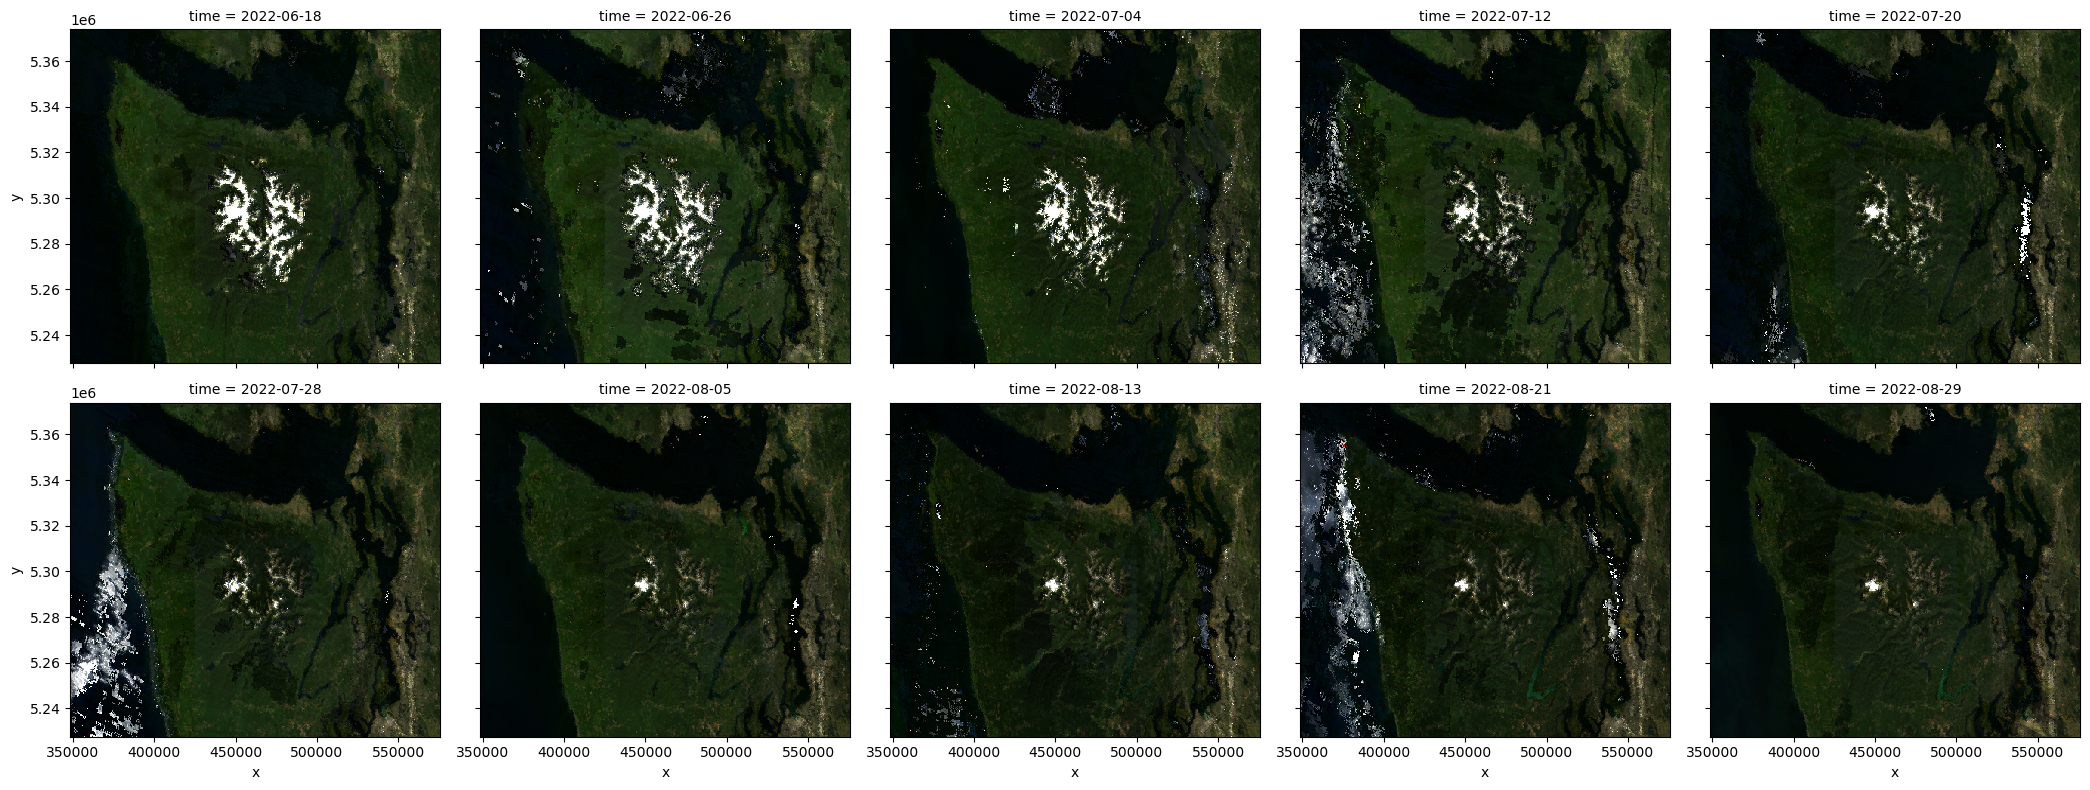

In [38]:
vis.plot.imshow(col="time", rgb="band", col_wrap=5, size=4)

## nDarray example 3: [ERA5 atmospheric reanalysis](https://cloud.google.com/storage/docs/public-datasets/era5)

### Read data

In [39]:
era5_ds = xarray.open_zarr(
    "gs://gcp-public-data-arco-era5/ar/1959-2022-full_37-1h-0p25deg-chunk-1.zarr-v2",
    chunks={'time': 48},
    consolidated=True,
    storage_options=dict(token='anon'),
    
)

def ds_swaplon(ds):
    return ds.assign_coords(longitude=(((ds.longitude + 180) % 360) - 180)).sortby('longitude')

era5_ds = ds_swaplon(era5_ds).rio.write_crs('EPSG:4326')

### Preview data structure

In [40]:
era5_ds

<xarray.Dataset> Size: 534TB
Dimensions:                                           (time: 552264,
                                                       latitude: 721,
                                                       longitude: 1440,
                                                       level: 37)
Coordinates:
  * latitude                                          (latitude) float32 3kB ...
  * level                                             (level) int64 296B 1 .....
  * time                                              (time) datetime64[ns] 4MB ...
  * longitude                                         (longitude) float32 6kB ...
    spatial_ref                                       int64 8B 0
Data variables: (12/31)
    10m_u_component_of_wind                           (time, latitude, longitude) float32 2TB dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    10m_v_component_of_wind                           (time, latitude, longitude) float32 2TB dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    2m_temperature                                    (time, latitude, longitude) float32 2TB dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    angle_of_sub_gridscale_orography                  (latitude, longitude) float32 4MB dask.array<chunksize=(721, 1440), meta=np.ndarray>
    anisotropy_of_sub_gridscale_orography             (latitude, longitude) float32 4MB dask.array<chunksize=(721, 1440), meta=np.ndarray>
    geopotential                                      (time, level, latitude, longitude) float32 85TB dask.array<chunksize=(48, 37, 721, 1440), meta=np.ndarray>
    ...                                                ...
    total_precipitation                               (time, latitude, longitude) float32 2TB dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    type_of_high_vegetation                           (latitude, longitude) float32 4MB dask.array<chunksize=(721, 1440), meta=np.ndarray>
    type_of_low_vegetation                            (latitude, longitude) float32 4MB dask.array<chunksize=(721, 1440), meta=np.ndarray>
    u_component_of_wind                               (time, level, latitude, longitude) float32 85TB dask.array<chunksize=(48, 37, 721, 1440), meta=np.ndarray>
    v_component_of_wind                               (time, level, latitude, longitude) float32 85TB dask.array<chunksize=(48, 37, 721, 1440), meta=np.ndarray>
    vertical_velocity                                 (time, level, latitude, longitude) float32 85TB dask.array<chunksize=(48, 37, 721, 1440), meta=np.ndarray>

### Visualize data

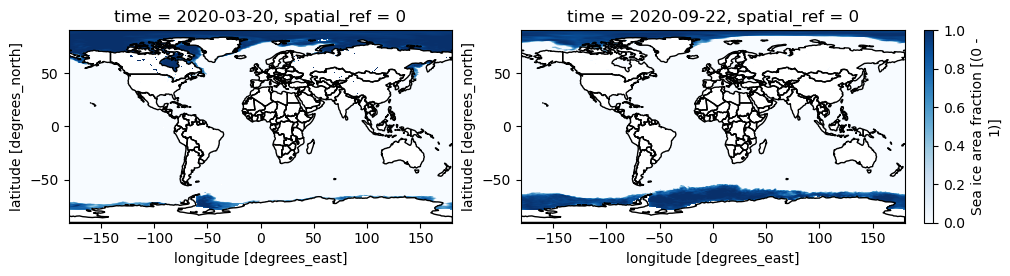

In [41]:
f,axs=plt.subplots(1,2,figsize=(10,7),layout='compressed')
era5_ds['sea_ice_cover'].sel(time='2020-03-20T00').plot(ax=axs[0],cmap='Blues',add_colorbar=False)
era5_ds['sea_ice_cover'].sel(time='2020-09-22T00').plot(ax=axs[1],cmap='Blues')

for ax in axs:
    world_gdf.boundary.plot(ax=ax,linewidth=1,color='black')

In [42]:
march20_seaice_extent_da = era5_ds['sea_ice_cover'].sel(time=((era5_ds.time.dt.month == 3) & 
          (era5_ds.time.dt.day == 20) & 
          (era5_ds.time.dt.hour == 1))
).rio.reproject('EPSG:6933')

In [43]:
sept22_seaice_extent_da = era5_ds['sea_ice_cover'].sel(time=((era5_ds.time.dt.month == 9) & 
          (era5_ds.time.dt.day == 22) & 
          (era5_ds.time.dt.hour == 1))
).rio.reproject('EPSG:6933')

In [44]:
march20_max_seaice_extent_NH_da = march20_seaice_extent_da.where(march20_seaice_extent_da.y>0).sum(dim=['x','y']).compute()
sept22_max_seaice_extent_SH_da = sept22_seaice_extent_da.where(sept22_seaice_extent_da.y<0).sum(dim=['x','y']).compute()

Text(0.5, 1.0, 'Very rough estimate of max sea ice extent over time')

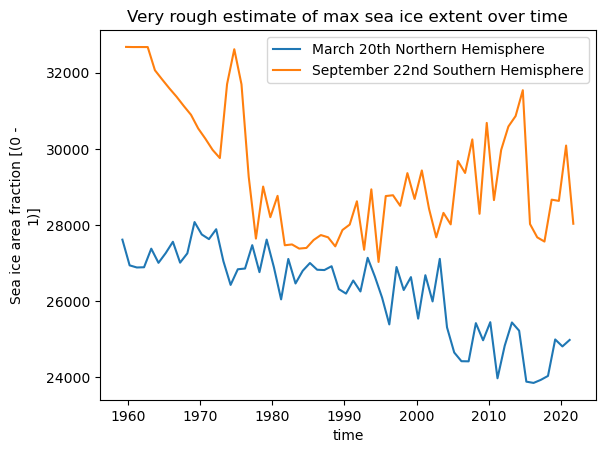

In [45]:
f,ax=plt.subplots()
march20_max_seaice_extent_NH_da.plot(ax=ax,label='March 20th Northern Hemisphere')
sept22_max_seaice_extent_SH_da.plot(ax=ax, label='September 22nd Southern Hemisphere')
ax.legend()
ax.set_title('Very rough estimate of max sea ice extent over time')

That's all, thanks for checking out this notebook!